In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("7-marketing_data.txt",sep='\t',encoding='UTF-16 LE')

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0   6/16/2014        0       189  ...                  6   
1         0   6/15/2014        0       464  ...                  7   
2         1   5/13/2014        0       134  ...                  5   
3         1   5/11/2014        0        10  ...                  2   
4         0    4/8/2014        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Income has 24 null values

In [6]:
df.Kidhome.unique()

array([0, 1, 2], dtype=int64)

In [7]:
df.Teenhome.unique()

array([0, 1, 2], dtype=int64)

In [8]:
df.Recency.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [9]:
df.columns = df.columns.str.replace(' ','')

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [11]:
df['Income']= df.Income.str.replace(',','')
df['Income']= df.Income.str.replace('$','').astype('float')

<ipython-input-11-7ff67fe65ec7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Income']= df.Income.str.replace('$','').astype('float')


In [12]:
df['Income'] =df.Income.fillna(value=df.Income.mean())

In [13]:
df["Income"].isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Income')

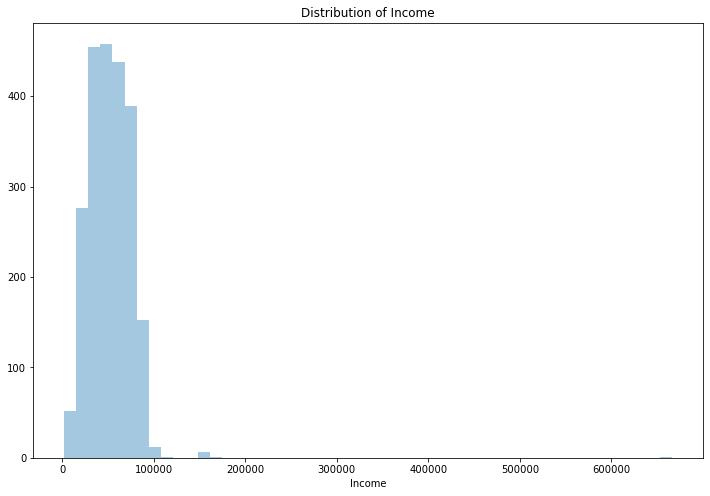

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(df.Income, kde=False, bins=50)
plt.title('Distribution of Income')

In [15]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0   6/16/2014        0       189  ...                  6                  1   
1   6/15/2014        0       464  ...                  7                  5   
2   5/13/2014        0       134  ...                  5                  2   
3   5/11/2014        0        10  ...                  2                  7   
4    4/8/2014        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain  Country  
0         1         0       SP  
1         1         0       CA  
2         0         0       US  
3         0         0      AUS  
4         1         0       SP  

[5 rows x 28 columns]

In [16]:
df.Income.describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [17]:
df=df[df['Year_Birth']>1900].reset_index(drop=True)
#to remove rows with year of birth less than 1900

In [18]:
df["Year_Birth"]

0       1970
1       1961
2       1958
3       1967
4       1989
        ... 
2232    1976
2233    1977
2234    1976
2235    1978
2236    1969
Name: Year_Birth, Length: 2237, dtype: int64

In [19]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0   6/16/2014        0       189  ...                  6                  1   
1   6/15/2014        0       464  ...                  7                  5   
2   5/13/2014        0       134  ...                  5                  2   
3   5/11/2014        0        10  ...                  2                  7   
4    4/8/2014        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain  Country  
0         1         0       SP  
1         1         0       CA  
2         0         0       US  
3         0         0      AUS  
4         1         0       SP  

[5 rows x 28 columns]

In [20]:
df["Marital_Status"].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [21]:
df["Marital_Status"].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [22]:
YOLO=df[df["Marital_Status"]=="YOLO"]
#query to get customer with marital status YOLO

In [23]:
YOLO

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
103    492        1973       PhD           YOLO  48432.0        0         1   
104  11133        1973       PhD           YOLO  48432.0        0         1   

    Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
103  10/18/2012        3       322  ...                  6                  8   
104  10/18/2012        3       322  ...                  6                  8   

     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
103             0             0             0             0             0   
104             0             0             0             0             0   

     Response  Complain  Country  
103         0         0       CA  
104         1         0      IND  

[2 rows x 28 columns]

In [24]:
df["Education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [25]:
Cycle=df[df["Education"]=="2n Cycle"]
#query to get customer with marital status YOLO

In [26]:
Cycle

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
6      4073        1954  2n Cycle        Married  63564.0        0         0   
10     2079        1947  2n Cycle        Married  81044.0        0         0   
18     1473        1960  2n Cycle         Single  47823.0        0         1   
36     2681        1984  2n Cycle        Married  65370.0        0         0   
42     1524        1983  2n Cycle         Single  81698.0        0         0   
...     ...         ...       ...            ...      ...      ...       ...   
2207   2320        1978  2n Cycle        Married  47025.0        0         1   
2220  10001        1985  2n Cycle       Together   7500.0        1         0   
2227   2106        1974  2n Cycle        Married  20130.0        0         0   
2228   3363        1974  2n Cycle        Married  20130.0        0         0   
2233   5263        1977  2n Cycle        Married  31056.0        1         0   

     Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
6      1/29/2014        0       769  ...                  7   
10    12/27/2013        0       450  ...                 10   
18     7/23/2013        0        53  ...                  3   
36      8/1/2013        1        71  ...                 13   
42      3/1/2013        1       709  ...                  5   
...          ...      ...       ...  ...                ...   
2207   9/12/2013       98       508  ...                  6   
2220    8/1/2012       98         5  ...                  3   
2227   3/17/2014       99         0  ...                  3   
2228   3/17/2014       99         0  ...                  3   
2233   1/22/2013       99         5  ...                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
6                     6             1             0             0   
10                    1             0             0             0   
18                    8             0             0             0   
36                    1             0             0             0   
42                    5             0             0             0   
...                 ...           ...           ...           ...   
2207                  9             0             0             0   
2220                  9             0             0             0   
2227                  8             0             0             0   
2228                  8             0             0             0   
2233                  8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
6                0             0         1         0      GER  
10               0             0         0         0       US  
18               0             0         0         0       CA  
36               0             0         0         0       SP  
42               1             0         1         0       SP  
...            ...           ...       ...       ...      ...  
2207             0             0         0         0       SP  
2220             0             0         0         0       SP  
2227             0             0         0         0       SP  
2228             0             0         0         0       SP  
2233             0             0         0         0       SP  

[201 rows x 28 columns]

In [27]:
df["Education"].value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [28]:
df["Education"].value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [29]:
df["Education"].value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

Changing Dtype of Dt_Customer form object to datetime format

In [30]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

Calculating Total Children of Customer

In [32]:
df['Children']= df.Kidhome+df.Teenhome

In [33]:
df.Children

0       0
1       0
2       1
3       2
4       1
       ..
2232    1
2233    1
2234    1
2235    0
2236    2
Name: Children, Length: 2237, dtype: int64

Calculating Total Amount Spent

In [34]:
df['TotalAmount']=df['MntWines']+ df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [35]:
df.TotalAmount

0       1190
1        577
2        251
3         11
4         91
        ... 
2232     689
2233      55
2234     309
2235    1383
2236    1078
Name: TotalAmount, Length: 2237, dtype: int64

Graph for Total Amount Spent

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Amount Spent')

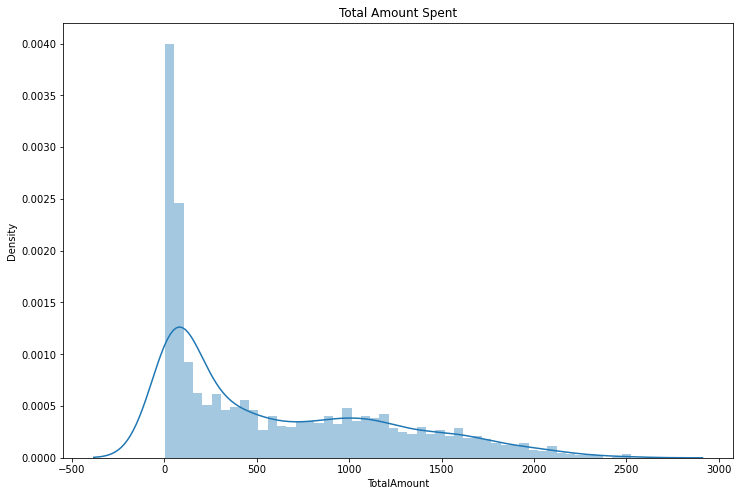

In [36]:
plt.figure(figsize=(12,8))
sns.distplot(df.TotalAmount, kde=True, bins=50)
plt.title('Total Amount Spent')

Combining all kinds of purchases to calculate total purchases

In [37]:
df['TotalPurchases']= df.NumDealsPurchases + df.NumCatalogPurchases + df.NumWebPurchases + df.NumStorePurchases

Graph for Total Purchases

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Purchases')

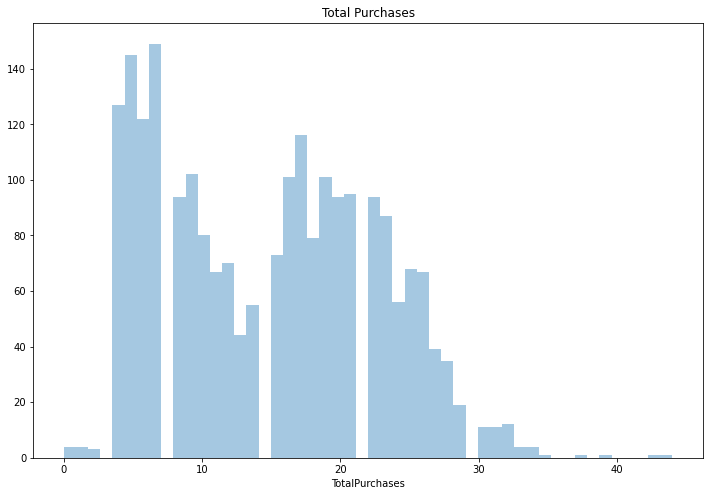

In [38]:
plt.figure(figsize=(12,8))
sns.distplot(df.TotalPurchases, kde=False, bins=50)
plt.title('Total Purchases')

Relationship between income and total amount spent

Text(0.5, 1.0, 'Relationship between income and total amount spent')

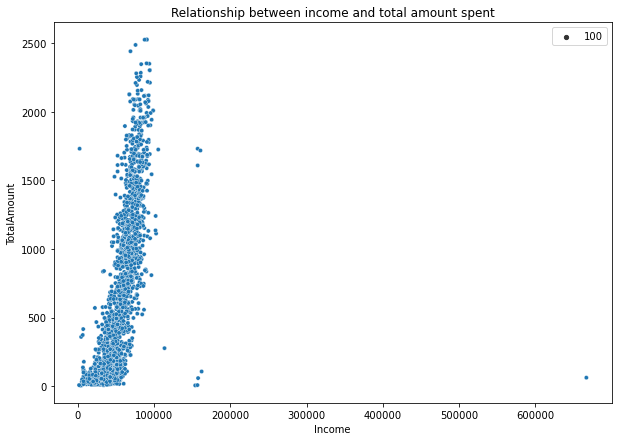

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.Income,y=df.TotalAmount,size=100)
plt.title('Relationship between income and total amount spent')

Text(0.5, 1.0, 'No. of Children Vs No of Purchases')

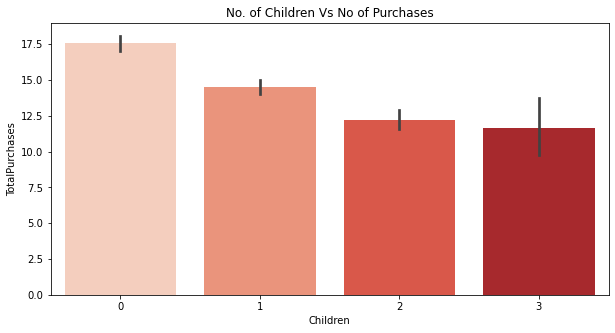

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(y=df.TotalPurchases,x=df.Children, palette='Reds')
plt.title('No. of Children Vs No of Purchases')

Text(0.5, 1.0, 'No. of Children Vs Total Amount Spent')

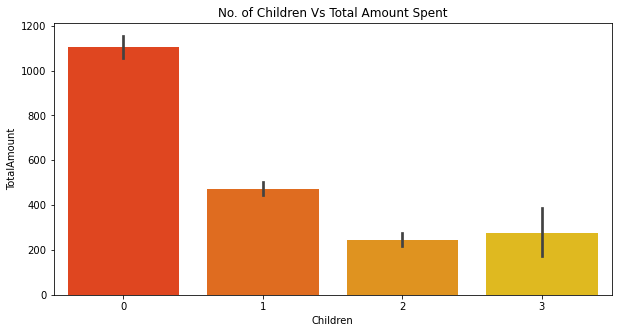

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(y=df.TotalAmount,x=df.Children, palette='autumn')
plt.title('No. of Children Vs Total Amount Spent')

Text(0.5, 1.0, 'No. of Children Vs Total Income')

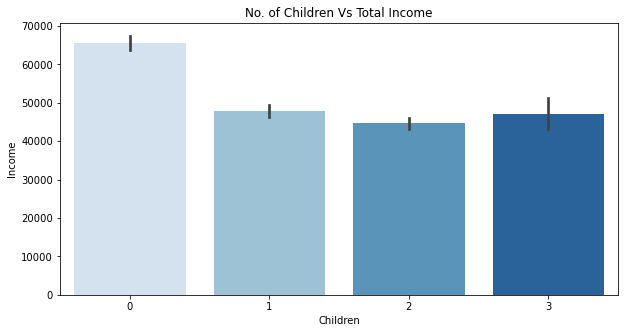

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(y=df.Income,x=df.Children, palette='Blues')
plt.title('No. of Children Vs Total Income')

In [43]:
#df2 is the data frame withoout unwanted columns
df2 = df.drop(columns=['ID','Dt_Customer'])

In [44]:
df2.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1970  Graduation       Divorced  84835.0        0         0        0   
1        1961  Graduation         Single  57091.0        0         0        0   
2        1958  Graduation        Married  67267.0        0         1        0   
3        1967  Graduation       Together  32474.0        1         1        0   
4        1989  Graduation         Single  21474.0        1         0        0   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp4  AcceptedCmp5  \
0       189        104              379  ...             0             0   
1       464          5               64  ...             0             0   
2       134         11               59  ...             0             0   
3        10          0                1  ...             0             0   
4         6         16               24  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Children  \
0             0             0         1         0       SP         0   
1             0             1         1         0       CA         0   
2             0             0         0         0       US         1   
3             0             0         0         0      AUS         2   
4             0             0         1         0       SP         1   

   TotalAmount  TotalPurchases  
0         1190              15  
1          577              18  
2          251              11  
3           11               4  
4           91               8  

[5 rows x 29 columns]

In [45]:
df2.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2237.000000    2237.000000  2237.000000  2237.000000  2237.000000   
mean   1968.901654   52236.696036     0.444345     0.506482    49.104604   
std      11.701917   25043.111847     0.538467     0.544593    28.956073   
min    1940.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35523.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51717.000000     0.000000     0.000000    49.000000   
75%    1977.000000   68281.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2237.000000  2237.000000      2237.000000      2237.000000   
mean    303.995530    26.270451       166.916853        37.523022   
std     336.574382    39.715972       225.661158        54.639909   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     1.000000        16.000000         3.000000   
50%     174.000000     8.000000        67.000000        12.000000   
75%     504.000000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count       2237.000000  ...   2237.000000   2237.000000   2237.000000   
mean          27.068842  ...      0.072865      0.074654      0.072418   
std           41.293949  ...      0.259974      0.262890      0.259237   
min            0.000000  ...      0.000000      0.000000      0.000000   
25%            1.000000  ...      0.000000      0.000000      0.000000   
50%            8.000000  ...      0.000000      0.000000      0.000000   
75%           33.000000  ...      0.000000      0.000000      0.000000   
max          263.000000  ...      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain     Children  \
count   2237.000000   2237.000000  2237.000000  2237.000000  2237.000000   
mean       0.064372      0.013411     0.149307     0.008941     0.950827   
std        0.245469      0.115052     0.356471     0.094152     0.752037   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%        0.000000      0.000000     0.000000     0.000000     0.000000   
50%        0.000000      0.000000     0.000000     0.000000     1.000000   
75%        0.000000      0.000000     0.000000     0.000000     1.000000   
max        1.000000      1.000000     1.000000     1.000000     3.000000   

       TotalAmount  TotalPurchases  
count  2237.000000     2237.000000  
mean    605.743406       14.870809  
std     601.840466        7.676593  
min       5.000000        0.000000  
25%      69.000000        8.000000  
50%     396.000000       15.000000  
75%    1045.000000       21.000000  
max    2525.000000       44.000000  

[8 rows x 26 columns]

Text(0.5, 1.0, 'Correlation Factors Heat Map')

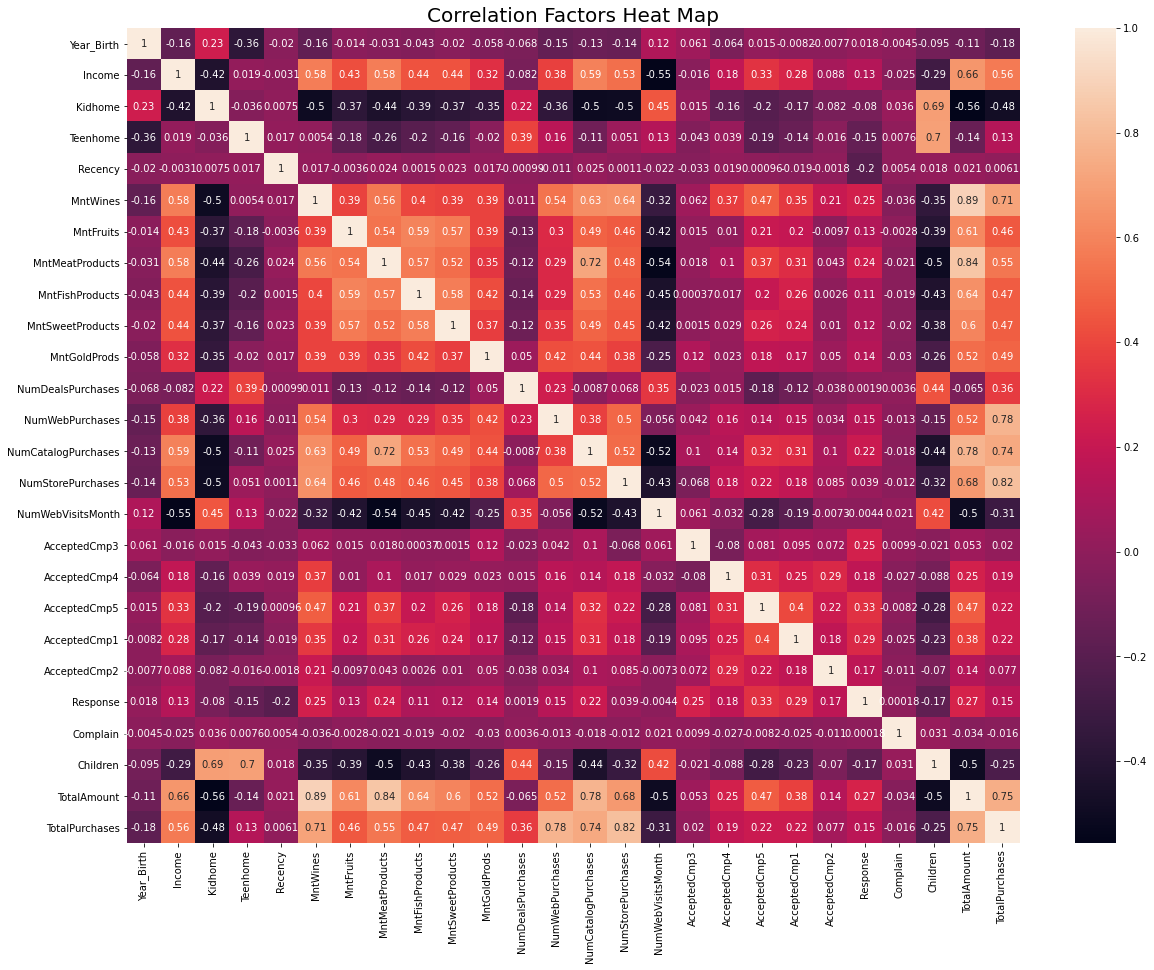

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [47]:
#adding all the campaigns
df2['TotalCmpAccepted']=df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.AcceptedCmp1 + df.AcceptedCmp2+ df.Response

In [48]:
df2['TotalCmpAccepted']

0       1
1       2
2       0
3       0
4       2
       ..
2232    0
2233    0
2234    0
2235    0
2236    3
Name: TotalCmpAccepted, Length: 2237, dtype: int64

In [49]:
df2.shape

(2237, 30)

Text(0.5, 1.0, 'Relationship between income and total Campaign Accepted')

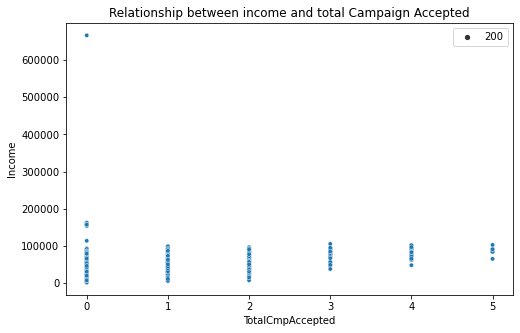

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df2.TotalCmpAccepted,y=df.Income,size=200)
plt.title('Relationship between income and total Campaign Accepted')

Relationship between Eduaction and Total amount spent

<AxesSubplot:xlabel='Education', ylabel='TotalAmount'>

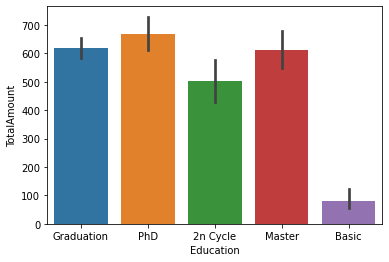

In [51]:
sns.barplot(x='Education',y='TotalAmount',data=df2)

In [52]:
df2.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1970  Graduation       Divorced  84835.0        0         0        0   
1        1961  Graduation         Single  57091.0        0         0        0   
2        1958  Graduation        Married  67267.0        0         1        0   
3        1967  Graduation       Together  32474.0        1         1        0   
4        1989  Graduation         Single  21474.0        1         0        0   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp5  AcceptedCmp1  \
0       189        104              379  ...             0             0   
1       464          5               64  ...             0             0   
2       134         11               59  ...             0             0   
3        10          0                1  ...             0             0   
4         6         16               24  ...             0             0   

   AcceptedCmp2  Response  Complain  Country  Children  TotalAmount  \
0             0         1         0       SP         0         1190   
1             1         1         0       CA         0          577   
2             0         0         0       US         1          251   
3             0         0         0      AUS         2           11   
4             0         1         0       SP         1           91   

   TotalPurchases  TotalCmpAccepted  
0              15                 1  
1              18                 2  
2              11                 0  
3               4                 0  
4               8                 2  

[5 rows x 30 columns]

<AxesSubplot:xlabel='Education', ylabel='TotalPurchases'>

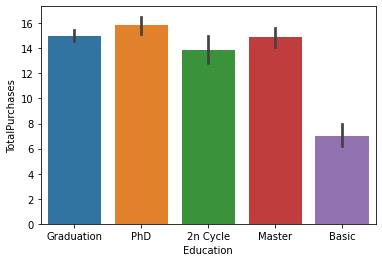

In [53]:
sns.barplot(x='Education',y='TotalPurchases',data=df2)

<AxesSubplot:xlabel='TotalCmpAccepted', ylabel='Income'>

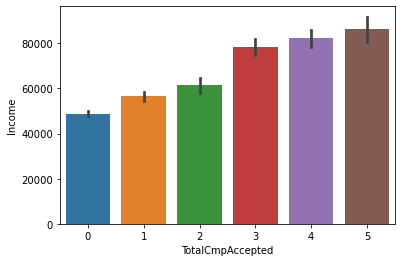

In [54]:
sns.barplot(x='TotalCmpAccepted',y='Income',data=df2,estimator=np.mean)

<AxesSubplot:xlabel='TotalCmpAccepted', ylabel='TotalAmount'>

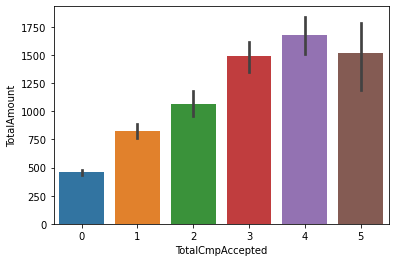

In [55]:
sns.barplot(x='TotalCmpAccepted',y='TotalAmount',data=df2,estimator=np.mean)

In [56]:
df2.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1970  Graduation       Divorced  84835.0        0         0        0   
1        1961  Graduation         Single  57091.0        0         0        0   
2        1958  Graduation        Married  67267.0        0         1        0   
3        1967  Graduation       Together  32474.0        1         1        0   
4        1989  Graduation         Single  21474.0        1         0        0   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp5  AcceptedCmp1  \
0       189        104              379  ...             0             0   
1       464          5               64  ...             0             0   
2       134         11               59  ...             0             0   
3        10          0                1  ...             0             0   
4         6         16               24  ...             0             0   

   AcceptedCmp2  Response  Complain  Country  Children  TotalAmount  \
0             0         1         0       SP         0         1190   
1             1         1         0       CA         0          577   
2             0         0         0       US         1          251   
3             0         0         0      AUS         2           11   
4             0         1         0       SP         1           91   

   TotalPurchases  TotalCmpAccepted  
0              15                 1  
1              18                 2  
2              11                 0  
3               4                 0  
4               8                 2  

[5 rows x 30 columns]

In [57]:
df['Recency'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [58]:
df2['Income_cat'] = pd.cut(df2['Income'],bins=3,labels=['low','medium','high'])

Text(0.5, 1.0, 'Income Category vs Total Amount Spent')

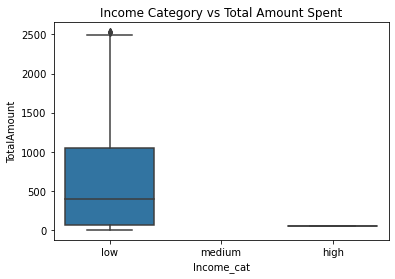

In [59]:
plt.figure()
sns.boxplot(x='Income_cat',y='TotalAmount',data=df2)
plt.title("Income Category vs Total Amount Spent")
#for the relationship between income_cat and total amount spent

In [60]:
df2.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1970  Graduation       Divorced  84835.0        0         0        0   
1        1961  Graduation         Single  57091.0        0         0        0   
2        1958  Graduation        Married  67267.0        0         1        0   
3        1967  Graduation       Together  32474.0        1         1        0   
4        1989  Graduation         Single  21474.0        1         0        0   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  AcceptedCmp2  \
0       189        104              379  ...             0             0   
1       464          5               64  ...             0             1   
2       134         11               59  ...             0             0   
3        10          0                1  ...             0             0   
4         6         16               24  ...             0             0   

   Response  Complain  Country  Children  TotalAmount  TotalPurchases  \
0         1         0       SP         0         1190              15   
1         1         0       CA         0          577              18   
2         0         0       US         1          251              11   
3         0         0      AUS         2           11               4   
4         1         0       SP         1           91               8   

   TotalCmpAccepted  Income_cat  
0                 1         low  
1                 2         low  
2                 0         low  
3                 0         low  
4                 2         low  

[5 rows x 31 columns]

In [61]:
df['TotalAmount'].max()

2525

<AxesSubplot:xlabel='TotalCmpAccepted', ylabel='TotalAmount'>

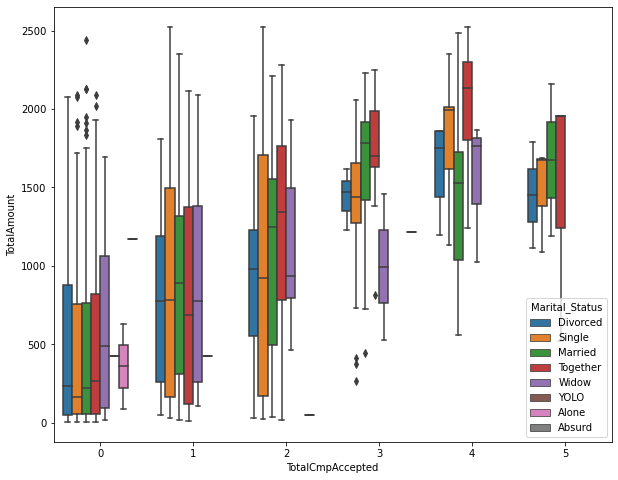

In [62]:
plt.figure(figsize=(10,8))
sns.boxplot(x='TotalCmpAccepted',y='TotalAmount',data=df2,hue='Marital_Status')

The above boxplot shows maximum campaign accepted is by people with 'Together' as marital status

In [63]:
df2.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Children', 'TotalAmount',
       'TotalPurchases', 'TotalCmpAccepted', 'Income_cat'],
      dtype='object')

In [64]:
df2.AcceptedCmp1.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='TotalCmpAccepted', ylabel='TotalAmount'>

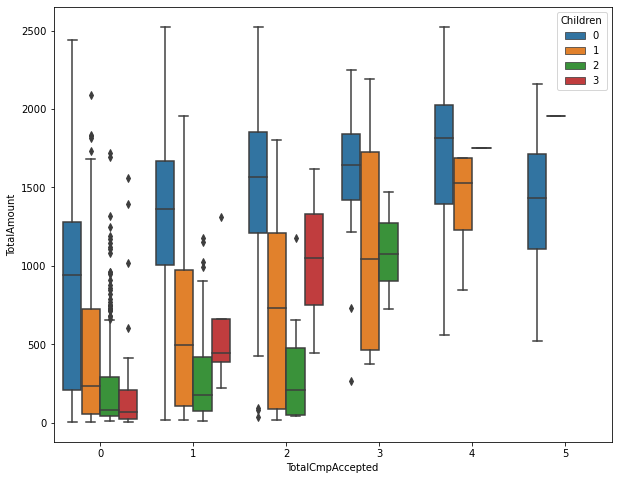

In [65]:
#finding relationship between campaign accepted , total no of children and Total amount spent
plt.figure(figsize=(10,8))
sns.boxplot(x='TotalCmpAccepted',y='TotalAmount',data=df2,hue='Children')

In [66]:
df2_5 = df2.query("0<=TotalCmpAccepted<6")

In [67]:
import plotly.express as px
fig = px.choropleth(df2_5, locations="Country",
                    color="TotalAmount", # Total amount spend
                    hover_name="Country", # column to add to hover information
                    animation_frame="TotalCmpAccepted", # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Total Amount Spent around the Globe',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}), # by default, projection type is set to 'equirectangular'
    width=800, height=600
)

fig.show()

In [68]:
df2['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

<Figure size 864x720 with 0 Axes>

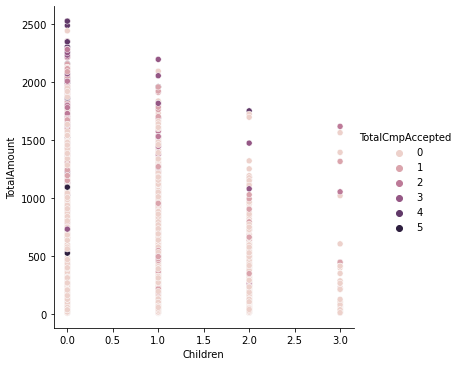

In [69]:
plt.figure(figsize=(12,10))
sns.relplot(x='Children',y='TotalAmount',hue='TotalCmpAccepted',kind='scatter',cmap='winter',data=df2)

The above graph depicts, that customers with no children spend the maximum amound and also have an acceptance to maximum campaigns.

<Figure size 864x720 with 0 Axes>

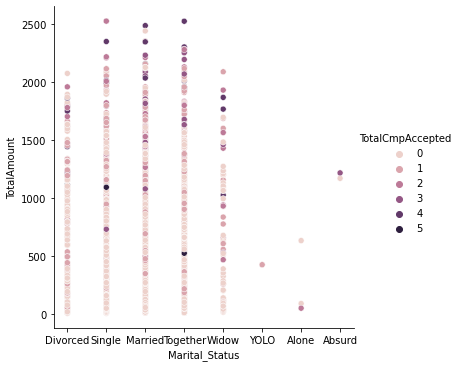

In [70]:
plt.figure(figsize=(12,10))
sns.relplot(x='Marital_Status',y='TotalAmount',hue='TotalCmpAccepted',kind='scatter',cmap='winter',data=df2)